# Datenanlyse zur Umfrage Persönliche Expertise

---

## Import libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data from csv

In [37]:
filename = 'data/export_0907.csv'
df = pd.read_csv(filename, sep=';')

In [38]:
df.head()

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,c_0002,c_0003,...,rnd_pg_7356560_3,rnd_pg_7356560_4,rnd_pg_7356560_5,rnd_pg_7356560_6,rnd_pg_7356570_1,rnd_pg_7356570_2,rnd_pg_7356570_3,rnd_pg_7356570_4,rnd_pg_7356570_5,rnd_pg_7356570_6
0,176,0,0,31,7356546,-77,783,3,-66,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
1,178,0,0,31,7356546,-77,1691,2,-66,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
2,181,0,0,31,7356546,-77,865,-66,1,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
3,182,0,0,31,7356546,-77,536,-66,2,-66,...,7356565,7356566,7356563,7356561,-77,-77,-77,-77,-77,-77
4,184,0,0,31,7356546,-77,680,1,-66,970,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77


In [39]:
import numpy as np
# Combine priming columns c_0001 and c_0002 into a single 'priming' column
df['priming'] = df['c_0001'].replace(-66, np.nan).fillna(df['c_0002']).astype(int)


In [40]:
# Create a mapping dictionary for variable names to keywords/questions
variable_mapping = {
    'v_216': 'Berufserfahrung Ja/Nein',
    'v_218': 'Berufserfahrung Bereich',
    'v_228': 'Berufserfahrung Dauer',
    'v_206': 'Faktentwissen Phase Designprozess',
    'v_207': 'Faktentwissen Laufweite',
    'v_208': 'Faktentwissen RGB',
    'v_209': 'Faktentwissen Gestaltpsychologie',
    'v_210': 'Faktentwissen Form folgt Funktion',
    'v_211': 'Faktentwissen Kerning',
    'v_212': 'Faktentwissen CMYK',
    'v_213': 'Faktentwissen Weniger ist mehr',
    'v_214': 'Faktentwissen Signifier',
    'v_215': 'Faktentwissen Goldener Schnitt',
    
    'v_8978': 'CVPA 1',
    'v_9154': 'CVPA 2',
    'v_9155': 'CVPA 3',
    'v_9156': 'CVPA 4',
    'v_9157': 'CVPA 5',
    'v_9158': 'CVPA 6',
    'v_9159': 'CVPA 7',
    'v_9160': 'CVPA 8',
    'v_9308': 'CVPA 9',
}

# Function to get readable column name
def get_readable_name(column_name):
    return variable_mapping.get(column_name, column_name)


In [41]:
def classify_professional(row):
    # Check if any CVPA score is less than 2
    cvpa_columns = ['v_8978', 'v_9154', 'v_9155', 'v_9156', 'v_9157', 'v_9158', 'v_9159', 'v_9160', 'v_9308']
    for col in cvpa_columns:
        if row[col] < 2:
            return False
    
    # Check if sum of CVPA scores is less than 34
    cvpa_sum = sum(row[col] for col in cvpa_columns)
    if cvpa_sum < 34:
        return False
    
    # Count correct answers for knowledge questions
    correct_answers = 0
    knowledge_answers = {
        'v_206': 3,
        'v_207': 3,
        'v_208': 2,
        'v_209': 2,
        'v_210': 3,
        'v_211': 3,
        'v_212': 2,
        'v_213': 4,
        'v_214': 1,
        'v_215': 3
    }
    
    for col, correct_value in knowledge_answers.items():
        if col in row and row[col] == correct_value:
            correct_answers += 1
    
    # Check if correct answers is less than 6
    if correct_answers < 6:
        return False
    
    return True

# Apply the classification function to create a new column
df['is_professional'] = df.apply(classify_professional, axis=1)

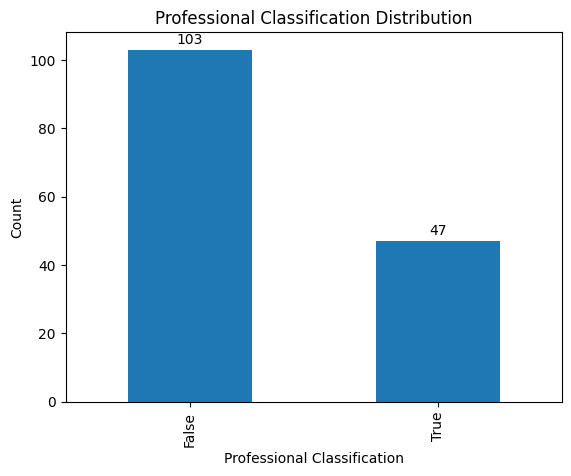

In [42]:
counts = df['is_professional'].value_counts()
ax = counts.plot(kind='bar', title='Professional Classification Distribution')
ax.set_xlabel('Professional Classification')
ax.set_ylabel('Count')

# Add value labels on top of bars
for i, v in enumerate(counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

## Forschungsfrage
- Hat die persönliche Expertise von
Konsument:innen einen Einfluss auf
Präferenzen und Preiserwartungen von
stilistisch konsistenten und
inkonsistenten Produktensembles.

## Hypothesen

### Hypothesen zu Präferenzen:
**H0₁:** Persönliche Expertise hat **keinen** Einfluss auf die Präferenzen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten = μ_Nicht-Experten (bezüglich Präferenzwerten)

**H1₁:** Persönliche Expertise hat einen **signifikanten** Einfluss auf die Präferenzen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten ≠ μ_Nicht-Experten (bezüglich Präferenzwerten)

### Hypothesen zu Preiserwartungen:
**H0₂:** Persönliche Expertise hat **keinen** Einfluss auf die Preiserwartungen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten = μ_Nicht-Experten (bezüglich Preiserwartungen)

**H1₂:** Persönliche Expertise hat einen **signifikanten** Einfluss auf die Preiserwartungen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten ≠ μ_Nicht-Experten (bezüglich Preiserwartungen)

### Statistische Tests:
- **Unabhängige t-Tests** für Mittelwertvergleiche zwischen Experten (`is_professional = True`) und Nicht-Experten (`is_professional = False`)
- **Signifikanzniveau:** α = 0.05
- **Zweiseitige Tests** (da keine gerichtete Hypothese vorliegt)

## Variablen
### Abhängige Variablen (AV)

- **Preiserwartung**  
  Für welchen Preis würden Sie erwarten, dass das Produkt/Ensemble angeboten wird? (metrisch)  
  - einzeln  
  - ensemble  
  - korrektur ensemble

- **Objektive Einzelbewertung (Liking)**  
  - minderwertig ↔ hochwertig (Likert-Skala)  
  - einfach ↔ luxuriös (Likert-Skala)  
  - billig ↔ teuer (Likert-Skala)

- **Subjektive Einzelbewertung (Liking)**  
  - Das Produkt gefällt mir gut. (Likert-Skala)  
  - Ich mag das Produkt. (Likert-Skala)  
  - Ich finde das Produkt ansprechend. (Likert-Skala)

- **Objektive Ensemble-Bewertung**  
  - minderwertig ↔ hochwertig (Likert-Skala)  
  - einfach ↔ luxuriös (Likert-Skala)  
  - billig ↔ teuer (Likert-Skala)

- **Subjektive Ensemble-Bewertung**  
  - Das Ensemble gefällt mir gut. (Likert-Skala)  
  - Ich mag das Ensemble. (Likert-Skala)  
  - Ich finde das Ensemble ansprechend. (Likert-Skala)

- **Produktdarstellung**  
  - Die Kombination vermittelt mir relevante Informationen über die Produkte. (Likert-Skala)  
  - Die gezeigte Zusammenstellung hilft mir, die Produkte besser zu verstehen. (Likert-Skala)  
  - Die Präsentation erleichtert es mir, die Produkte zu beurteilen. (Likert-Skala)  
  - Durch die Präsentation kann ich mir vorstellen, welche Personen dieses Outfit tragen würden. (Likert-Skala)  
  - Durch die Präsentation kann ich mir vorstellen, in welchen beruflichen Situationen das Outfit getragen wird. (Likert-Skala)  
  - Ich verstehe, wie man die Teile elegant, seriös und professionell kombiniert. (Likert-Skala)

- **Bewertungsleichtigkeit**  
  - Es fällt mir leicht, das Outfit zu bewerten. (Likert-Skala)  
  - Ich erfasse das Outfit visuell schnell. (Likert-Skala)  
  - Ich kann mir das Outfit mit geschlossenen Augen in Erinnerung rufen. (Likert-Skala)  
  - Ich kann das Outfit später einer anderen Person beschreiben. (Likert-Skala)

- **Gesamtwirkung**  
  - uneinheitlich ↔ einheitlich (Likert-Skala)  
  - unstimmig ↔ stimmig (Likert-Skala)  
  - unharmonisch ↔ harmonisch (Likert-Skala)

- **Stileinordnung**  
  - Hippie (Likert-Skala)  
  - Hip Hop / Active Wear (Likert-Skala)  
  - Boho (Likert-Skala)

---

### Unabhängige Variablen (UV)


- **Priming-Konsistenz**  
  - konsistentes Ensemble  
  - inkonsistentes Ensemble  
  - inkonsistentes Ensemble mit nichtansprechendem Oberteil

- **Stilrichtung**  
  - Hippie × Minimalistisch

- **Produktkategorie**  
  - Oberteil

- **Expertenstatus**  
  - Experte vs. Nicht-Experte (gemäß Faktenwissen & CVPA)

> **Design:** 3 × 2-Faktor (Priming-Konsistenz × Expertenstatus), between-subjects

---

### Kontroll- und Störvariablen

- **Demografische Variablen**  
  - Alter (metrisch, Jahre)  
  - Geschlecht (nominal, z. B. m/w/d)  
  - Einkommen (metrisch oder ordinal gruppiert)  
  - Bildungsgrad (ordinal)  
  - Beruf (nominal)

- **Berufserfahrung**  
  - (metrisch, Jahre)

- **CVPA-Score**  
  - (metrisch)

- **Faktenwissen-Score**  
  - (metrisch)


## Überprüfung der Hypothesen

---

### Hypothese 1 (Präferenzwerte)
- **Hypothese:**  
  - H₀₁: μ$_{Experten}$ = μ$_{NOT-Experten}$
  - H₁₁: μ$_{Experten}$ ≠ μ$_{NOT-Experten}$
- **Variable:**  
  - ΔLiking = Liking $_{konsistent}$ – Liking $_{inkonsistent}$
- **Methode:**  
  - **Unabhängiger t-Test** (zweiseitig)  
    - *Warum:* Vergleich von Mittelwerten zweier unabhängiger Gruppen bei intervallskaliertem DV  
- **Voraussetzungen prüfen:**  
  - **Normalverteilung** der ΔLiking in beiden Gruppen (Shapiro-Wilk-Test)
  - **Varianzhomogenität** (Levene-Test)  
- **Alternative bei Verletzung:**  
  - **Mann-Whitney-U-Test** (zweiseitig)  
    - *Warum:* Kein parametrischer Test, robust gegen Normalitätsverletzung  
- **Effektstärke:**  
  - Cohen’s d (t-Test) oder Rang-Biseriale Korrelation (Mann-Whitney)

---

### Hypothese 2 (Preiserwartungen)
- **Hypothese:**  
  - H₀₂: μ$_{Experten}$ = μ$_{NOT-Experten}$
  - H₁₂: μ$_{Experten}$ ≠ μ$_{NOT-Experten}$
- **Variable:**  
  - ΔPreis = Preiserwartung $_{konsistent}$ – Preiserwartung $_{inkonsistent}$
- **Statistisches Mittel & Vorgehen:**  
  - Analog zu Hypothese 1 (t-Test, Voraussetzungen, Alternative, Effektstärke)

---

### Signifikanz & Bericht
- **α = 0,05** (zweiseitig)  
- **Bericht:**  
  - Teststatistik (t-Wert bzw. U-Wert), p-Wert, Effektstärke  
  - Überprüfung der Testvoraussetzungen dokumentieren  


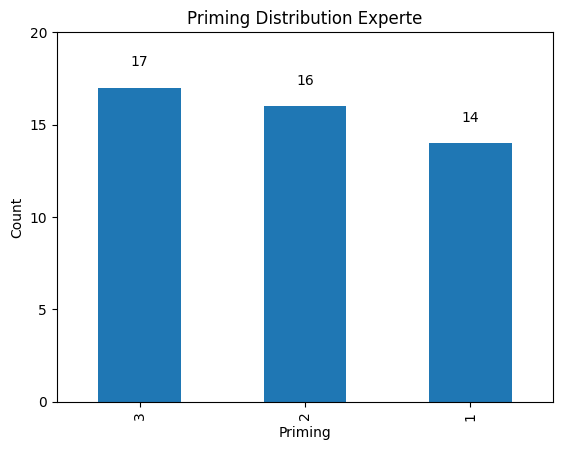

In [43]:
# Distribution of priming levels
filtered_rows = df[df['is_professional']].copy()
priming_counts = filtered_rows['priming'].value_counts()
ax = priming_counts.plot(kind='bar', title='Priming Distribution Experte')
ax.set_xlabel('Priming')
ax.set_ylabel('Count')
ax.set_yticks(range(0, priming_counts.max() + 5, 5))

# Add value labels on top of bars
for i, v in enumerate(priming_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

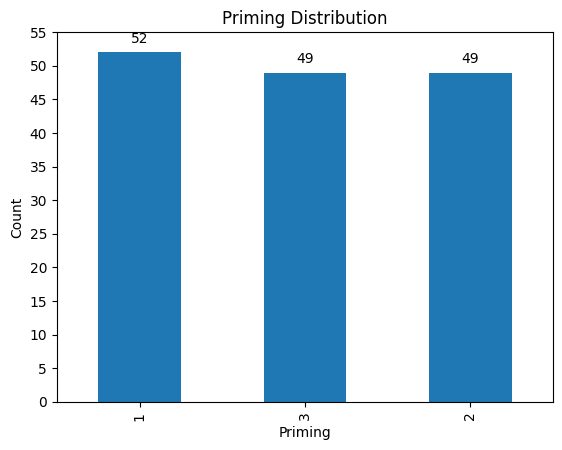

In [44]:
# Alternative priming distribution (column c_0002 replaced)
# Using combined 'priming' column instead
priming_counts = df['priming'].value_counts()
ax = priming_counts.plot(kind='bar', title='Priming Distribution')
ax.set_xlabel('Priming')
ax.set_ylabel('Count')
ax.set_yticks(range(0, priming_counts.max() + 5, 5))

# Add value labels on top of bars
for i, v in enumerate(priming_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

In [56]:
rename_map = dict()
inverse_map = dict()
def reduce_columns(row):
    # Get all columns that start with 'v_'
    v_columns = [col for col in row.index if col.startswith('v_')]

    # Filter out columns that have negative values
    valid_columns = ['priming', 'is_professional']  # Always include these columns
    counter = 0
    for col in v_columns:
        try:
            if int(row[col]) >= 0:
                valid_columns.append(col)
                counter += 1
                if f"Q{counter}" not in rename_map:
                    rename_map[f"Q{counter}"] = col
                else:
                    rename_map[f"Q{counter}"] += col
                
                if col not in inverse_map:
                    inverse_map[col] = f"Q{counter}"
                else:
                    inverse_map[col] = f"Q{counter}"
        except ValueError:
            # If conversion to int fails, skip this column
            continue
    
    # Create the result series with renamed columns
    result = {}
    for col in valid_columns:
        if col in inverse_map:
            # Use the Q-column name from inverse_map
            result[inverse_map[col]] = row[col]
        else:
            # Keep original column name for non-v columns
            result[col] = row[col]
    
    return pd.Series(result)
    


combined_df = df.apply(reduce_columns, axis=1)
combined_df.head()

,priming,is_professional,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99
0,3,True,2,0,0,0,0,0,0,0,...,5,4,3,4,3,2,51,1,2,4
1,2,True,1,1,1,0,1,0,0,0,...,5,5,4,5,1,1,47,1,2,4
2,1,False,2,0,0,0,0,0,0,0,...,5,5,4,4,2,2,60,2,2,5
3,2,False,2,0,0,0,0,0,0,0,...,5,5,5,4,1,1,22,1,1,1
4,1,True,2,0,0,0,1,0,0,0,...,4,5,4,4,1,3,19,1,1,3


In [57]:
def get_original_columns(q_cols, rename_maps):
    """
    Given a list of new column names (e.g., ['Q1', 'Q2']),
    and the list of rename_maps used for each subset,
    return a list of lists where each inner list contains
    the corresponding original 'v_' column names.
    """
    original_cols_list = []
    for rename_map in rename_maps:
        inv_map = {new: old for old, new in rename_map.items()}
        originals = [inv_map.get(q, None) for q in q_cols]
        original_cols_list.append(originals)
    return original_cols_list

# Example usage:
# original_lists = get_original_columns(['Q33', 'Q34'], rename_maps)
# print(original_lists)

In [58]:
get_original_columns(['Q155', 'Q156', 'Q157'], rename_maps)

[['v_11358', 'v_11359', 'v_11360'],
 ['v_11300', 'v_11301', 'v_11302'],
 ['v_11373', 'v_11374', 'v_11375']]

In [59]:
def get_q_columns_from_v(v_cols, rename_maps):
    """
    Given a list of original 'v_' column names and the list of rename_maps,
    return a set of corresponding new 'Q' column names across all subsets.
    """
    q_cols_set = set()
    for rename_map in rename_maps:
        for v in v_cols:
            if v in rename_map:
                q_cols_set.add(rename_map[v])
    return q_cols_set

# Example usage:
q_set = get_q_columns_from_v(['v_10915'], rename_maps)
print(q_set)

{'Q42'}


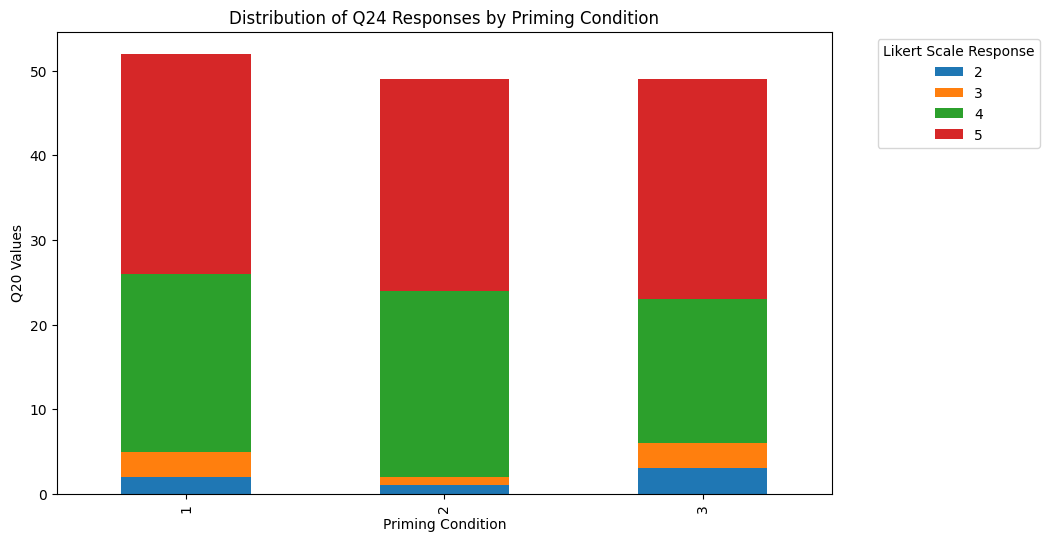

In [55]:
# Create a stacked bar chart showing distribution of responses
response_counts = combined_df.groupby(['priming', 'Q24']).size().unstack(fill_value=0)
ax = response_counts.plot(kind='bar', stacked=True, figsize=(10, 6), 
                         title='Distribution of Q24 Responses by Priming Condition')
ax.legend(title='Likert Scale Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('')  
plt.xlabel('Priming Condition')
plt.ylabel('Q20 Values')
plt.show()

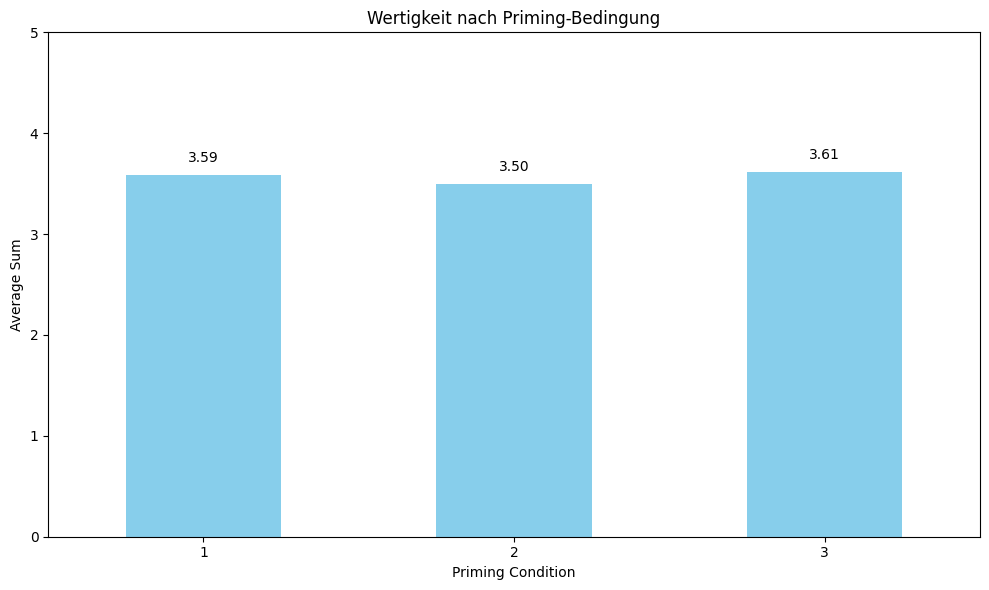

In [63]:
q_set = get_q_columns_from_v(['v_10903','v_10904','v_10905'], rename_maps)
# q_set = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']  # Example Q columns to analyze

columns_to_analyze = list(q_set)

# Calculate mean of the columns for each row, then average by priming condition
if columns_to_analyze:
    combined_df['mean_columns'] = combined_df[columns_to_analyze].mean(axis=1)
    mean_by_priming = combined_df.groupby(['priming'])['mean_columns'].mean()
    
    # Create bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))
    mean_by_priming.plot(kind='bar', ax=ax, title='Wertigkeit nach Priming-Bedingung', color='skyblue')
    ax.set_xlabel('Priming Condition')
    ax.set_ylabel('Average Sum')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(range(0, 6, 1))
    
    # Add value labels on top of bars
    for i, v in enumerate(mean_by_priming.values):
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("No columns available for analysis")

<Figure size 1000x600 with 0 Axes>

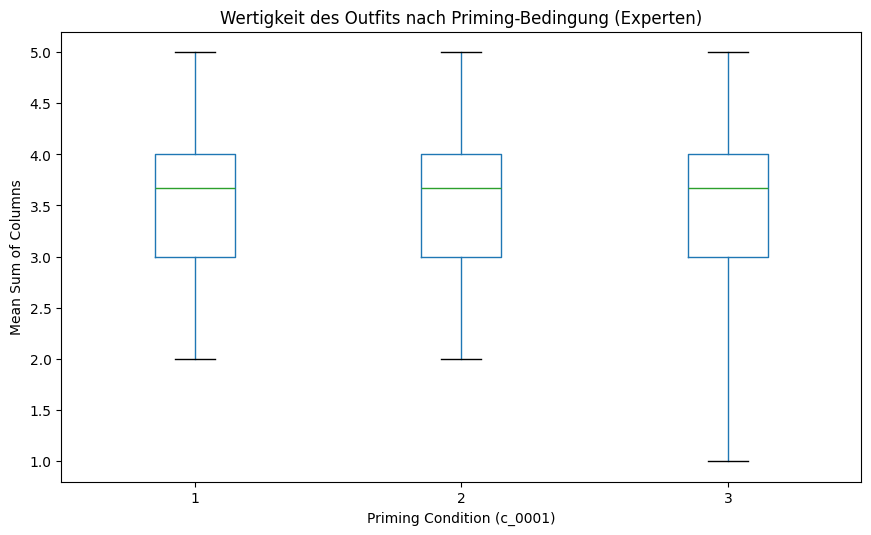

In [62]:
# Boxplot of mean_columns distribution by priming condition
plt.figure(figsize=(10, 6))
# Use pandas boxplot grouped by c_0001, whiskers to min/max to include all points
combined_df.boxplot(column='mean_columns', by='priming', grid=False, figsize=(10, 6), whis=[0,100])
plt.title('Wertigkeit des Outfits nach Priming-Bedingung (Experten)')
plt.xlabel('Priming Condition (c_0001)')
plt.ylabel('Mean Sum of Columns')
plt.suptitle('')  # clear the automatic suptitle
plt.show()